Naufal Afthar Razzan - 2440083134 - LB07

In [9]:
# opening csv file
import pandas as pd
pcell = pd.read_csv('cell_samples.csv')
pcell

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [20]:
# suspecting of not normal values
temp = pcell.BareNuc.str.find('?')
temp.value_counts()

-1    683
 0     16
Name: BareNuc, dtype: int64

In [52]:
# replace ? with NaN
import numpy as np
pcell2 = pcell.replace('?', np.nan)
pcell2.BareNuc.isnull().value_counts()

False    683
True      16
Name: BareNuc, dtype: int64

In [53]:
# replace nan with mode
pcell2.BareNuc.fillna(int(pcell2.BareNuc.mode()), inplace = True)
pcell2.isnull().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [54]:
# change datatype to int
pcell2 = pcell2.astype({'BareNuc':'int'})
pcell2.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [61]:
# feature & labels
Xcell = pcell2.iloc[:, 1:10]
Ycell = pcell2.Class

from sklearn import preprocessing
Xcell = preprocessing.StandardScaler().fit(Xcell).transform(Xcell.astype(float))
Xcell

array([[ 0.20693572, -0.69999505, -0.74329904, ..., -0.17966213,
        -0.61182504, -0.34391178],
       [ 0.20693572,  0.28384518,  0.2668747 , ..., -0.17966213,
        -0.28411186, -0.34391178],
       [-0.50386559, -0.69999505, -0.74329904, ..., -0.17966213,
        -0.61182504, -0.34391178],
       ...,
       [ 0.20693572,  2.25152563,  2.28722218, ...,  1.87236122,
         2.33759359,  0.23956962],
       [-0.14846494,  1.59563215,  0.94032386, ...,  2.69317056,
         1.02674087, -0.34391178],
       [-0.14846494,  1.59563215,  1.61377302, ...,  2.69317056,
         0.37131451, -0.34391178]])

In [65]:
# split training & test set
from sklearn.model_selection import train_test_split
Xcell_train, Xcell_test, Ycell_train, Ycell_test = train_test_split(Xcell, Ycell, test_size = 0.2, random_state = 109)
print('Training set: ', Xcell_train.shape, Xcell_test.shape)
print('Test set: ', Ycell_train.shape, Ycell_test.shape)

Training set:  (559, 9) (140, 9)
Test set:  (559,) (140,)


In [67]:
# svm model
from sklearn import svm
cancer = svm.SVC(kernel = 'rbf')
# train model
cancer.fit(Xcell_train, Ycell_train)
# predict the response for test dataset
pred_cancer = cancer.predict(Xcell_test)

In [81]:
# evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(Ycell_test, pred_cancer, labels = [2, 4]))
print('\n\nAccuracy Score: ', accuracy_score(Ycell_test, pred_cancer))

              precision    recall  f1-score   support

           2       0.98      0.97      0.97        96
           4       0.93      0.95      0.94        44

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



Accuracy Score:  0.9642857142857143


<AxesSubplot:xlabel='Predicted Label', ylabel='True Label'>

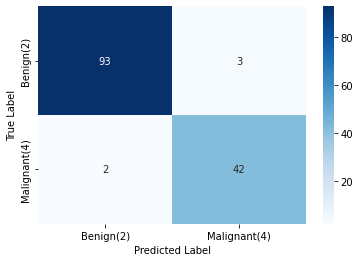

In [88]:
# plot confusion matrix
import seaborn as sns
categories = ['Benign(2)', 'Malignant(4)']
df_cm = pd.DataFrame(confusion_matrix(Ycell_test, pred_cancer), columns = categories, index = categories)
df_cm.index.name = 'True Label'
df_cm.columns.name = 'Predicted Label'
sns.heatmap(df_cm, cmap = 'Blues', annot = True)